<a href="https://colab.research.google.com/github/AvinaShree/Netflix-Movies-TV-shows-Data-Exploration-and-Visualization-/blob/main/Netflix_AWP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing Libraries**

In [ ]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Will explore the Netflix dataset through visualizations and graphs using python libraries, matplotlib, and seaborn. It will hepl to understand data more effectively through graphs and visualisations. We used TV Shows and Movies listed on the Netflix dataset from Kaggle. The dataset consists of TV Shows and Movies available on Netflix as of 2002

**2. Loading the Dataset - Netflix Movies and Shows** 

In [ ]:
netflix = pd.read_csv("/content/drive/MyDrive/Datasets/netflix.csv")

**3. To check no. of rows & columns**
* The shape is a tuple that gives us an indication of the no. of dimensions in the array. 

In [ ]:
print(netflix.shape)

(8807, 12)


**4. Read first 7 values of dataset**


* Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

In [ ]:
netflix.head(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


**5. Check Null Values**
* isnull () function is used to identify the missing values in the data frame and sum () functions to get sum of all missing values per column. 

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**6. Check Unique Values- nunique()**

* The nunique() function is used to count distinct observations over requested axis.
Return Series with number of distinct observations. Can ignore NaN values.

In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**7. Check Duplicate Values**
* Pandas duplicated () method helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements. 
sum() to get sum of all duplicated values.
'o' means , we dont have any duplicated values.

In [ ]:
netflix.duplicated().sum()

0

**8. Make duplicate copy of dataset**
* The copy() method returns a copy of the specified dataframe or series.

In [ ]:
new_netflix = netflix.copy()

**9. Count no. of rowa & columns of duplicate dataset**

In [ ]:
new_netflix.shape

(8807, 12)

**10. Summary of dataframe**
* Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.


In [ ]:
new_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**11.The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.**

In [ ]:
new_netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# **Data Visualization**
# * Data visualization is basically representing the raw data in a visual format such as a bar chart, pie chart, histogram, scatterplot, etc. This is extremely important in this age of Big Data because it is very difficult to understand such large amounts of data without context.

**12. Bar Chart -  to check no. of movies and tv shows**


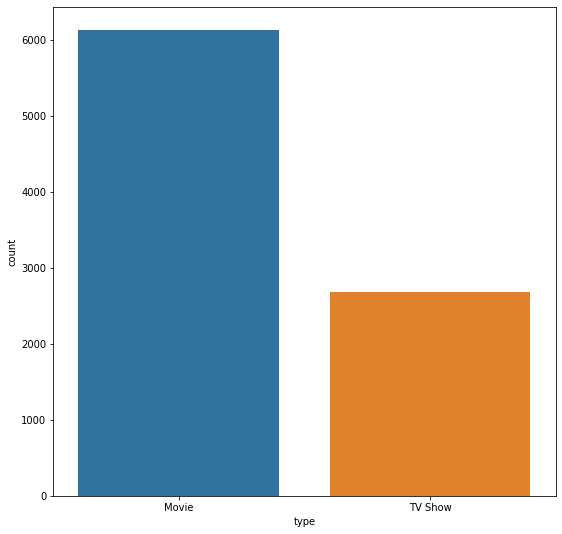

In [ ]:
labels = ['Movie', 'TV show']
sns.countplot(x='type',data = new_netflix)


**13. Bar Chart - to display Realese Years**

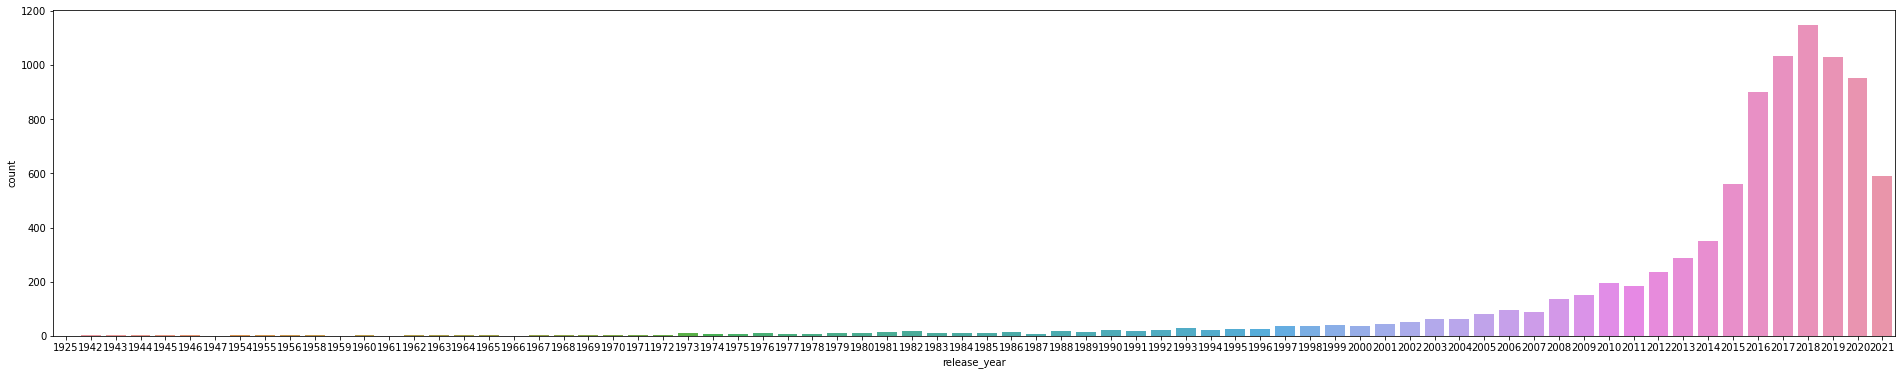

In [ ]:
plt.figure(figsize = (33,6))
sns.countplot(x='release_year',data = new_netflix)

**14. Pie Chart - to check distribution according to rating**

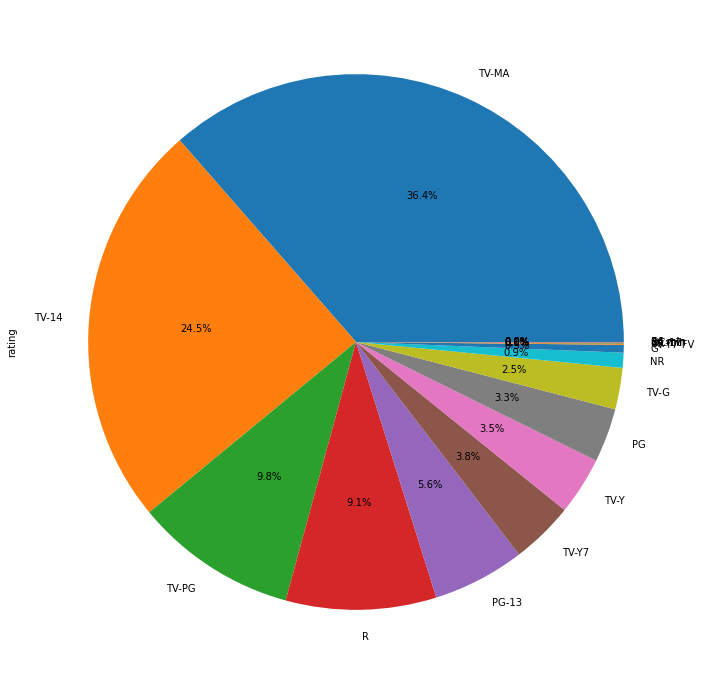

In [ ]:
new_netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(12,30))
plt.show()

**15.Bar Chart - To check relation between Type and Rating**

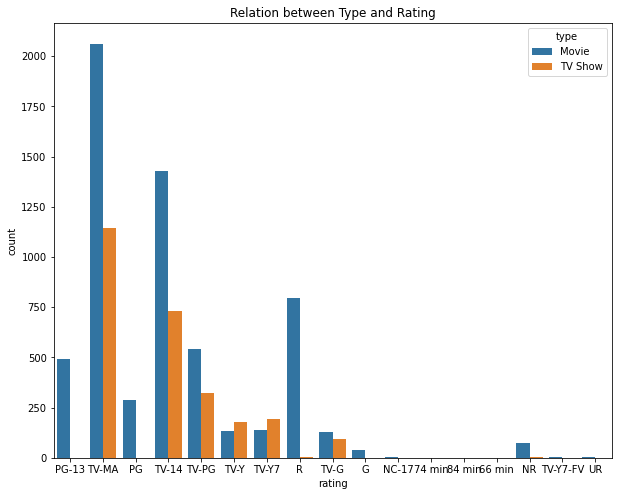

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=new_netflix)
plt.title('Relation between Type and Rating')
plt.show()

**16. Bar Chart - to check Frequency of Movies which were released in different years and are available on Netflix**

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

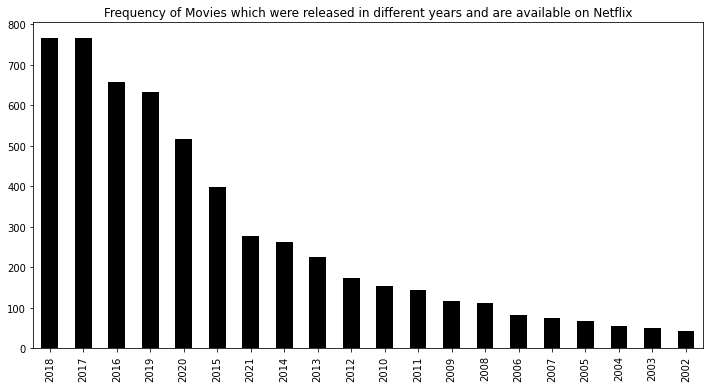

In [ ]:
plt.figure(figsize=(12,6))
new_netflix[new_netflix["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="black")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")


**17.Bar Chart - to check Frequency of TV Shows which were released in different years and are available on Netflix**

Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

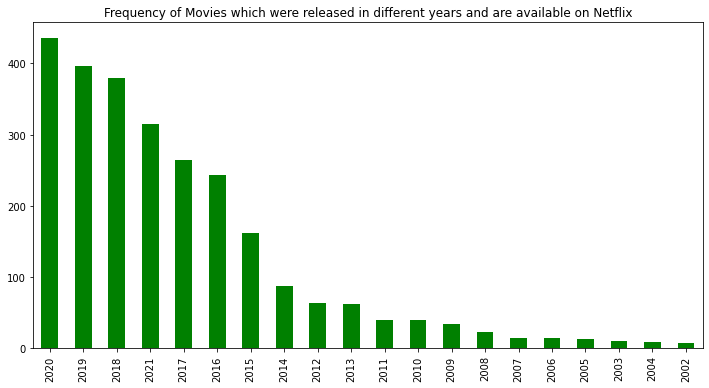

In [ ]:
plt.figure(figsize=(12,6))
new_netflix[new_netflix["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="green")
plt.title("Frequency of TV Shows which were released in different years and are available on Netflix")


**18. to display different cast in picture**

In [ ]:
from wordcloud import WordCloud

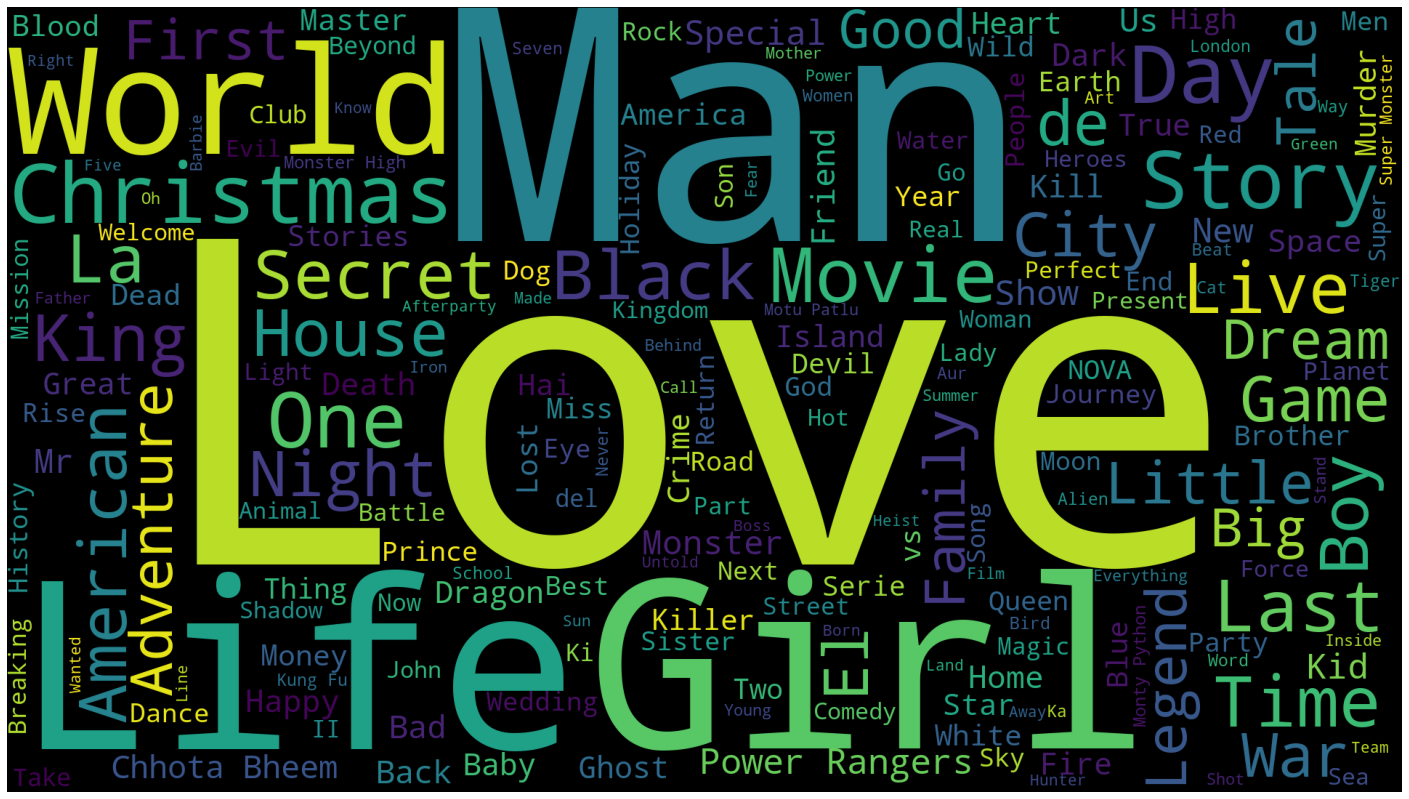

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(new_netflix.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()